In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Memuat Dataset dan enampilkan 5 baris awal
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Menamppilkan informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Analisis Deskriptif
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Cek Missing values
print("\nMissing values per ftur: ")
print(df.isnull().sum())


Missing values per ftur: 
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


##EDA

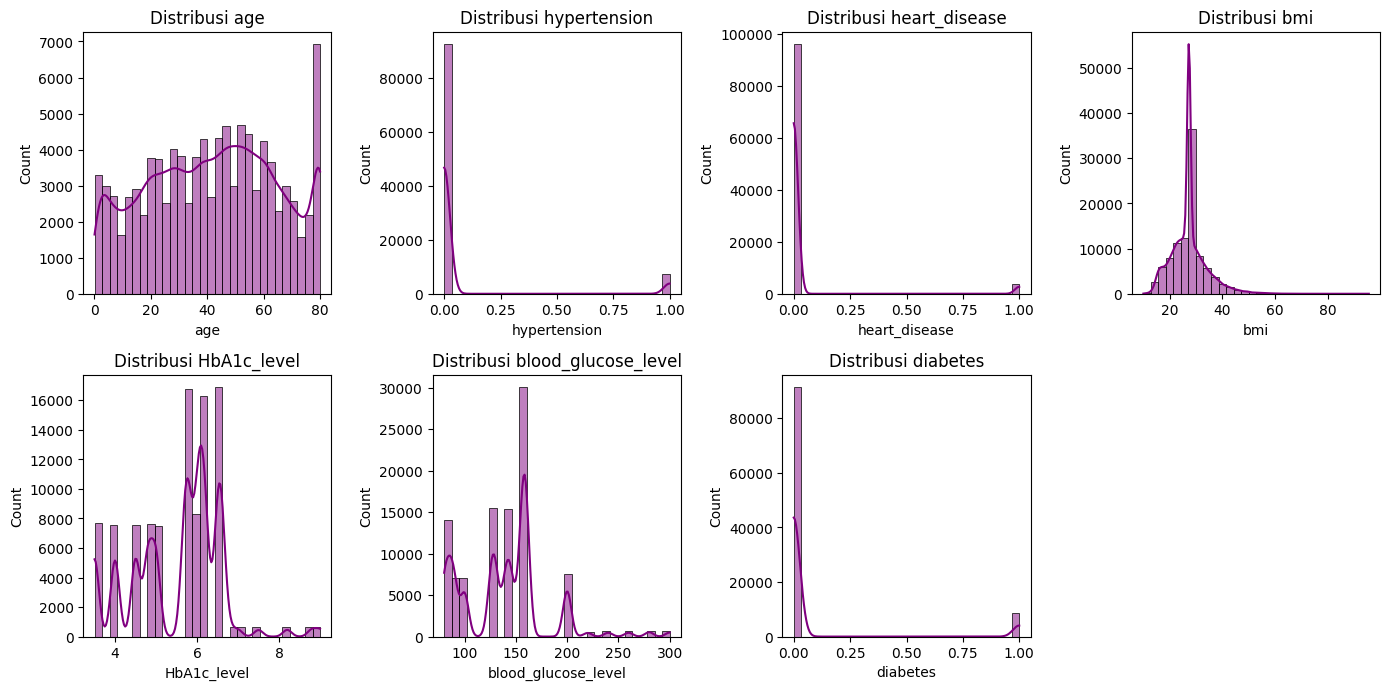

In [ ]:
# Ditribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

<ipython-input-21-145008007>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
<ipython-input-21-145008007>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


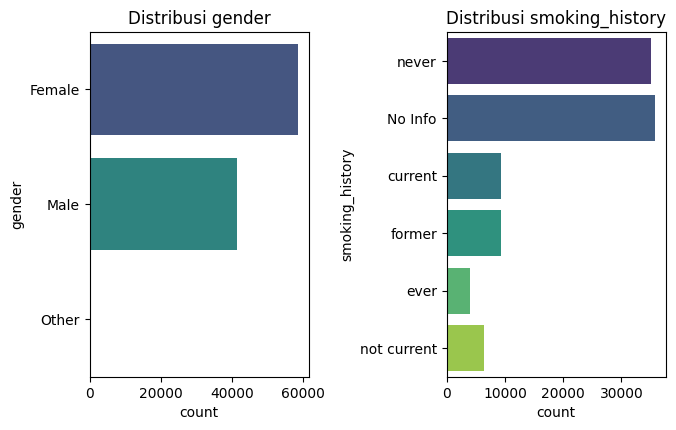

In [ ]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=['object'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

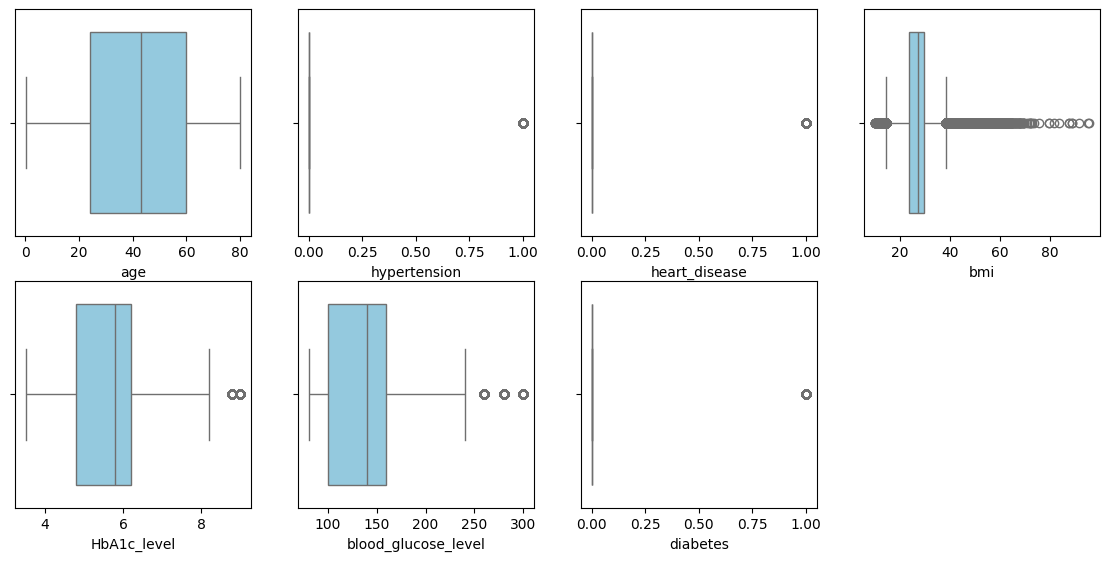

In [ ]:
# Cek Outlier pada fitur numerik
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column], color='skyblue')

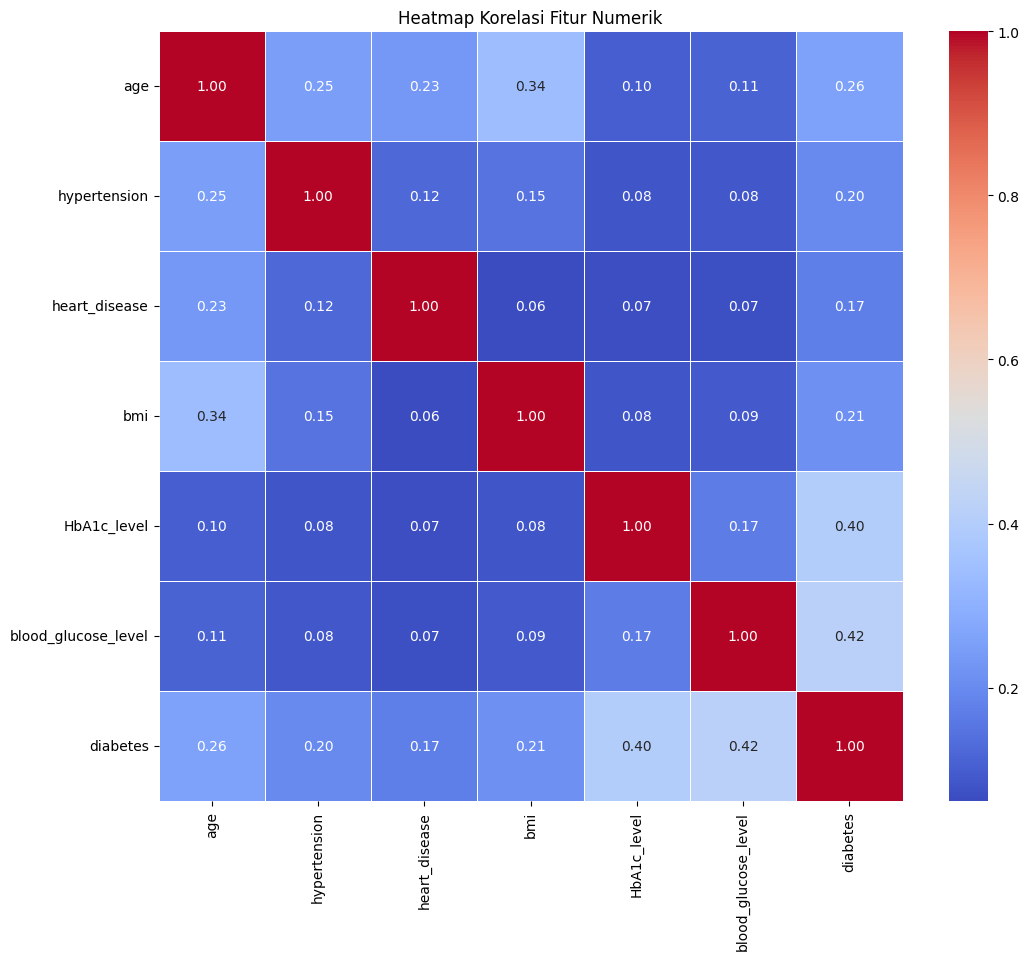

In [ ]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

<ipython-input-25-2245561637>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='viridis')


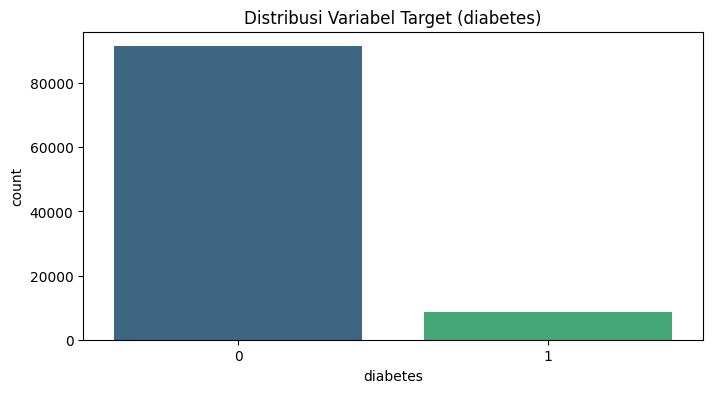

In [ ]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='diabetes', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (diabetes)')
plt.show()

## Data Splitting & Standardisasi & Encoder

In [ ]:
# Pisah fitur (X) dan target (y)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

from sklearn.preprocessing import LabelEncoder
# Buat instance LabelEncoder
encoder = LabelEncoder()

# List kolom kategorikal yang perlu di encode
categorical_columns = ['gender', 'smoking_history']

# Encode kolom kategorikal
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

from sklearn.preprocessing import StandardScaler
# Buat instance Standardisasi
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


# Split data menjadi set pelatihan dan set uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(80000, 8)

In [ ]:
X_test.shape

(20000, 8)

In [ ]:
y_train.shape

(80000,)

In [ ]:
y_test.shape

(20000,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
# Persiapan semua model tanpa Tuning
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=2, metric='euclidean').fit(X_train, y_train)
nb = GaussianNB(priors=None, var_smoothing=1e-9).fit(X_train, y_train)
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, probability=False, max_iter=-1).fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, max_features=None, splitter='best',random_state=None).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=None, bootstrap=True).fit(X_train, y_train)
mlp = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', learning_rate='constant').fit(X_train, y_train)
sgd = SGDClassifier(loss='hinge', max_iter=100, alpha=0.0001, learning_rate='optimal').fit(X_train, y_train)
abc = AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='deprecated', random_state=None).fit(X_train, y_train)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None).fit(X_train, y_train)
xgb = XGBClassifier(n_estimators= 100, learning_rate=0.3, max_depth=6, subsample=1.0).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FN)': fn,
        'False Negative (FP)': fp,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilny
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn,X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)':evaluate_model(svm,X_test, y_test),
    'Naive Bayes': evaluate_model(nb, X_test, y_test),
    'Multilayer Perceptron (MLP)': evaluate_model(mlp, X_test, y_test),
    'Stochastic Gradient Descent (SGD)': evaluate_model(sgd, X_test, y_test),
    'AdaBoost': evaluate_model(abc, X_test, y_test),
    'Gradient Boosting': evaluate_model(gbc, X_test, y_test),
    'XGBoost': evaluate_model(xgb, X_test, y_test)
}

# Buat DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                               Model  Accuracy  Precision    Recall  F1-Score
0          K-Nearest Neighbors (KNN)   0.95925   0.853523  0.631148  0.725682
1                      Decision Tree   0.95200   0.712500  0.734192  0.723183
2                 Random Forest (RF)   0.97065   0.950925  0.692037  0.801084
3       Support Vector Machine (SVM)   0.96235   0.976072  0.573185  0.722243
4                        Naive Bayes   0.90475   0.458561  0.638173  0.533660
5        Multilayer Perceptron (MLP)   0.97230   0.988156  0.683841  0.808304
6  Stochastic Gradient Descent (SGD)   0.95625   0.859983  0.582553  0.694590
7                           AdaBoost   0.97215   1.000000  0.673888  0.805177
8                  Gradient Boosting   0.97245   0.987363  0.686183  0.809672
9                            XGBoost   0.97090   0.952572  0.693794  0.802846


In [ ]:
# Membuat fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.xlabel('Predicted', fontsize=8)
    plt.show()

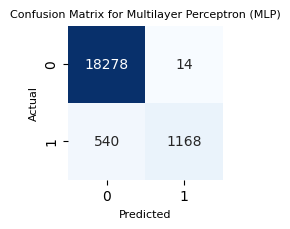

In [ ]:
# Tampilkan Confusion Matrix untuk AdaBoost
mlp_cm = results['Multilayer Perceptron (MLP)']['Confusion Matrix']
plot_confusion_matrix(mlp_cm, 'Multilayer Perceptron (MLP)')

- True Positive (TP) = 18278: Model berhasil mengidentifikasi 18278 pasien yang benar-benar Diabetes.

- False Positive (FP) = 540: Model salah mengidentifikasi 540 pasien yang sebenarnya tidak Diabetes sebagai Diabetes.

- True Negative (TN) = 1168: Model benar mengidentifikasi pasien yang tidak Diabetes.

- False Negative (FN) = 14: Model gagal mengidentifikasi 14 pasien yang sebenarnya Diabetes.

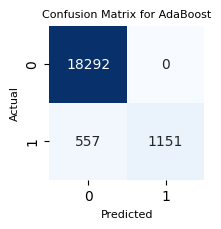

In [ ]:
# Tampilkan Confusion Matrix untuk AdaBoost
abc_cm = results['AdaBoost']['Confusion Matrix']
plot_confusion_matrix(abc_cm, 'AdaBoost')

- True Positive (TP) = 18298: Model berhasil mengidentifikasi 18292 pasien yang benar-benar Diabetes.

- False Positive (FP) = 557: Model salah mengidentifikasi 557 pasien yang sebenarnya tidak Diabetes sebagai Diabetes.

- True Negative (TN) = 1151: Model benar mengidentifikasi pasien yang tidak Diabetes.

- False Negative (FN) = 0: Model gagal mengidentifikasi 0 pasien yang sebenarnya Diabetes.

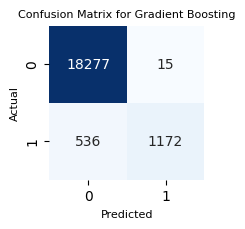

In [ ]:
# Tampilkan Confusion Matrix untuk AdaBoost
gbc_cm = results['Gradient Boosting']['Confusion Matrix']
plot_confusion_matrix(gbc_cm, 'Gradient Boosting')

In [ ]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1.187234,1.381824,-0.284439,-0.202578,0.434128,-0.384340,-1.893686,-1.426210
48955,1.187234,1.692704,-0.284439,-0.202578,0.963327,-0.409955,0.161108,0.170530
44966,-0.841047,-0.172576,-0.284439,-0.202578,-0.095071,-0.450637,-1.426688,0.489878
13568,-0.841047,-0.705514,-0.284439,-0.202578,1.492525,-1.273329,-0.492690,-0.934905
92727,-0.841047,0.848886,3.515687,-0.202578,-0.624269,-0.785138,-0.959689,-1.303384
...,...,...,...,...,...,...,...,...
6265,1.187234,0.315949,-0.284439,-0.202578,0.963327,0.852711,0.161108,-1.426210
54886,-0.841047,-1.194039,-0.284439,-0.202578,0.963327,0.117412,-0.492690,0.514444
76820,1.187234,0.005069,-0.284439,-0.202578,0.963327,-0.177913,0.254508,-1.303384
860,-0.841047,-0.216988,-0.284439,-0.202578,0.963327,-0.355711,0.628107,0.489878


- True Positive (TP) = 18277: Model berhasil mengidentifikasi 18278 pasien yang benar-benar Diabetes.

- False Positive (FP) = 536: Model salah mengidentifikasi 536 pasien yang sebenarnya tidak Diabetes sebagai Diabetes.

- True Negative (TN) = 1172: Model benar mengidentifikasi pasien yang tidak Diabetes.

- False Negative (FN) = 15: Model gagal mengidentifikasi 15 pasien yang sebenarnya Diabetes.

In [ ]:
import pickle

# Save the AdaBoost model to a pickle file
with open('GradientBoosting.pkl', 'wb') as f:
    pickle.dump(gbc, f)

print("Gradient Boosting model saved to GradientBoosting.pkl")

Gradient Boosting model saved to GradientBoosting.pkl
